# ___

# [ Machine Learning in Geosciences ]


## **Test 2 ** 

*Author: Petra Krsková*

*Date: 13.5.2024* 

___


### 1.1 The Problem

TASK: 

1/ Develop a Neural Network model in PyTorch to fit a model to the blow given simulated data. 

2/ Find the best depth of the model in order to minimize the error (MSE) but assuring the model generalize well on test data as well. 

In this work, we explore Deep Learning approach to **predict the non-linear function**.


### 1.2 Assumptions

* The problem is a non-linear regression task; 
* There is no continuous flow of data, hence batch learning shall be applied; 
* There are enough measurements with rather low noise, so we would not need model regularisation to fit reasonable model. 


### 1.3 Expected results 

* Deep Learning ANN model to predict the y based on the input X. 
___    


In [5]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [2]:
# Data 
x = np.arange(-1.2, 1.8, 0.01)
y = (x**6) - (x**5) - (x**4) - (x**3) - (x**2) - x 
noise = 0.4 * np.random.normal(size=x.size)
data = y + noise

In [30]:
# reshape data
x = x.reshape(-1,1)
data = data.reshape(-1,1)

# convert data into torch tensors
t_x = torch.from_numpy(x).float()
t_data = torch.from_numpy(data).float()

In [32]:
# explore data
print(f"x shape: {t_x.shape}")
print(f"y shape: {t_data.shape}")
print(type(t_x))

x shape: torch.Size([300, 1])
y shape: torch.Size([300, 1])
<class 'torch.Tensor'>


In [25]:
# explore data
print(f"x shape: {t_x.dtype}")
print(f"y shape: {t_data.dtype}")

x shape: torch.float32
y shape: torch.float32


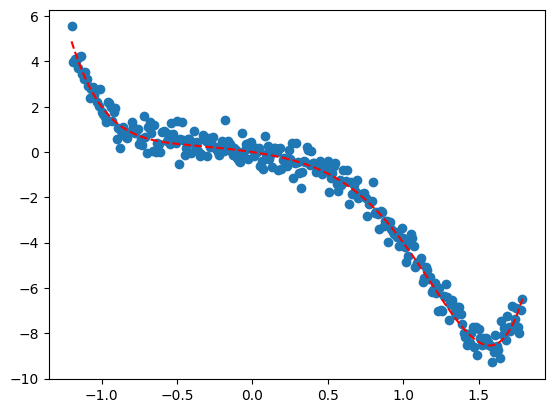

In [4]:
# Plotting the simulated data
plt.scatter(x,data)
plt.plot(x, y, 'r--')
plt.show()

In [ ]:
# Provide your solution here ... 

### Design the ANN model

In [26]:
# Nonlinear model with n hidden layers 
class NonLinear(nn.Module):
    def __init__(self, num_features, num_hidden_layers):
        super(NonLinear, self).__init__()
        
        self.nn_input = nn.Sequential(nn.Linear(num_features, 32),
                                      nn.ReLU())
        
        self.num_hidden_layers = num_hidden_layers 
        self.hidden_layer_list = []
        self.hidden_layer = nn.Sequential(nn.Linear(32, 32), 
                                  nn.ReLU()
                                 )     
        for i in range(num_hidden_layers):
            self.hidden_layer_list.append(self.hidden_layer)
    
        self.hidden_layers = nn.ModuleList(self.hidden_layer_list)        
        

        self.nn_output = nn.Sequential(nn.Linear(32,1))

    def forward(self, inputs):
        x = self.nn_input(inputs)

        for i in range(len(self.hidden_layers)):
            x = self.hidden_layers[i](x) 
        
        x = self.nn_output(x)
    
        return (x)

In [33]:
# Nonlinear model with two hidden layers 
class NonLinear_2(nn.Module):
    def __init__(self, num_features):
        super(NonLinear_2, self).__init__()
        
        self.nn_block = nn.Sequential(nn.Linear(num_features, 16),
                                      nn.ReLU(),
                                      nn.Linear(16,16),
                                      nn.ReLU(),
                                      nn.Linear(16,1),
                                      nn.ReLU())

    def forward(self, inputs):
        x = self.nn_block(inputs)
        
        return (x)

In [49]:
# instantiate the model (num_features, num_hidden_layers)
model = NonLinear(1,3)
#model = NonLinear_2(1)
model

NonLinear(
  (nn_input): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
  )
  (hidden_layer): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): ReLU()
  )
  (hidden_layers): ModuleList(
    (0-2): 3 x Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
  )
  (nn_output): Sequential(
    (0): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [50]:
# optimization 
learning_rate = 0.01
epoches = 1000

# loss: regression -> MSE
criterion = nn.MSELoss()

# optimizer: stochastic gradient descent 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

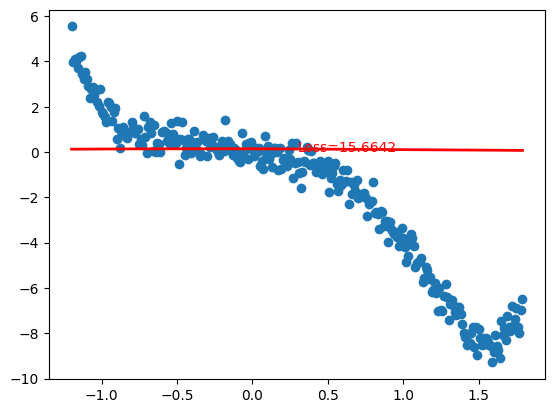

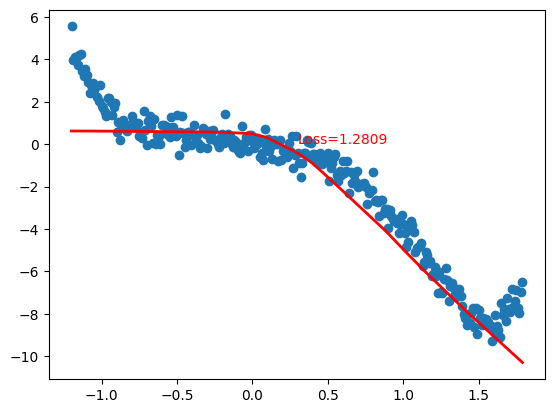

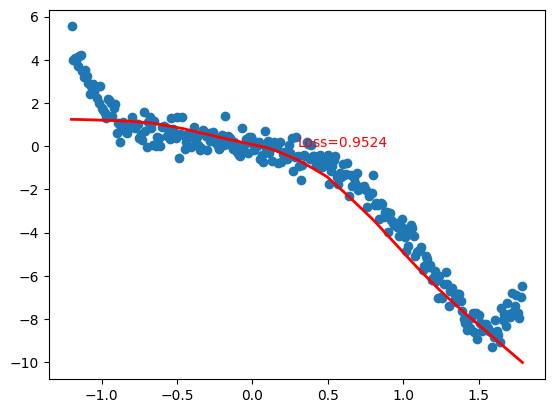

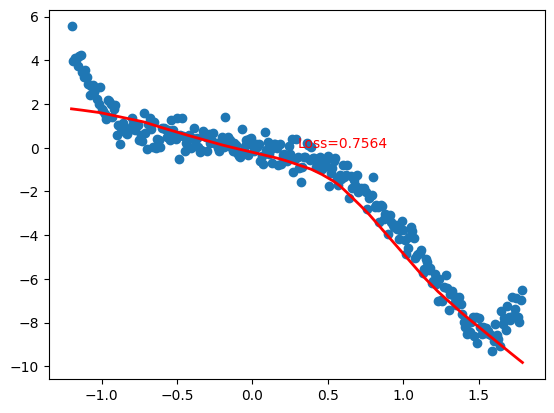

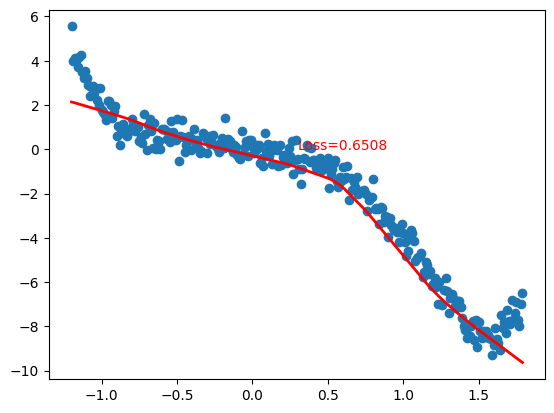

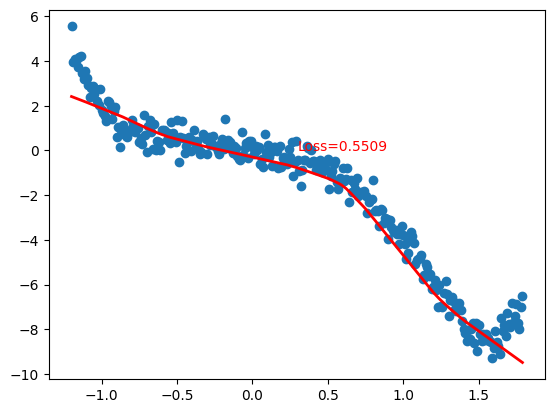

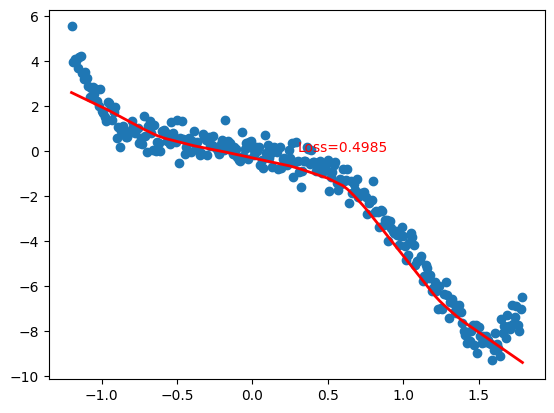

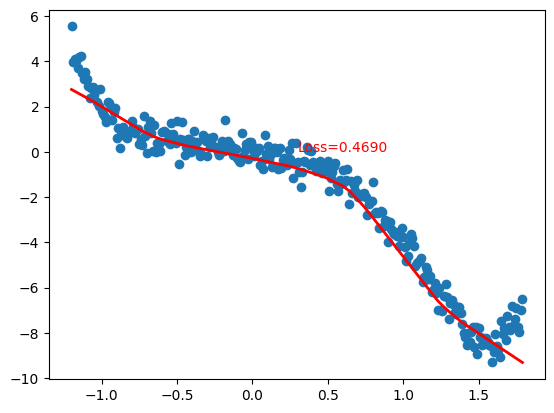

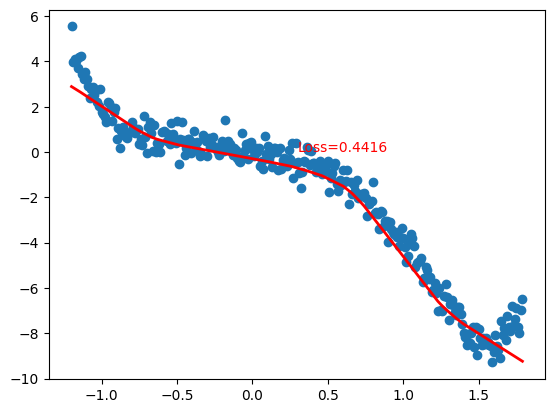

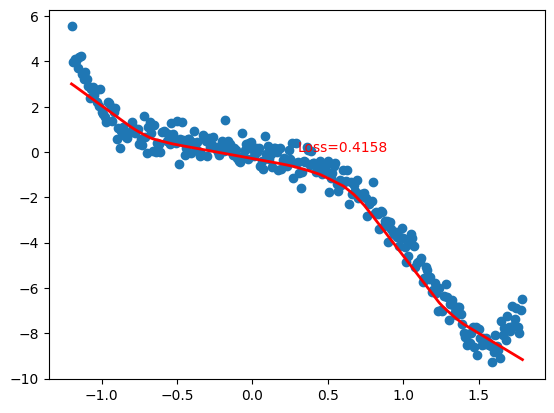

In [51]:
# training
inputs = Variable(t_x)
outputs = Variable(t_data)

for i in range(epoches):
    # apply model
    prediction = model(inputs)
    #prediction = model.forward(inputs)
    # get loss 
    loss = criterion(prediction,t_data)
    # remove gradiens from optimizaer previous step with .zero_grad()
    optimizer.zero_grad() 
    # backpropagation on loss 
    loss.backward() 
    # optimization .step()
    optimizer.step() 

    # plot model result with loss 
    if i % 100 == 0:
        plt.cla()
        plt.scatter(t_x.data.numpy(), t_data.data.numpy())
        plt.plot(t_x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
        plt.text(0.3, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.01)

plt.show()